<a href="https://colab.research.google.com/github/rushikeshmuley/Computer-vision-project/blob/main/yolo_world_ppe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## YOLO-WORLD

YOLO-WORLD paper:  https://arxiv.org/pdf/2401.17270v2.pdf

Source code: https://github.com/AILab-CVC/YOLO-World

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.0/716.0 kB 7.4 MB/s eta 0:00:00


In [2]:
import ultralytics
ultralytics.__version__

'8.1.18'

### loading a pre-trained yolo-world model and running a prediction on an image.

In [3]:
from ultralytics import YOLOWorld

# Initialize a YOLO-World model
model = YOLOWorld('yolov8l-world.pt')  # or select yolov8m/l-world.pt for different sizes

# Execute inference with the YOLOv8s-world model on the specified image
results = model.predict('a.jpg', device='cpu', save=True)

# Show results
results[0].show()

100%|██████████| 91.2M/91.2M [00:00<00:00, 220MB/s]

WARNING ⚠️ yolov8l-world.pt appears to require 'dill', which is not in ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official YOLOv8 model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.9 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 7.4s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


image 1/1 /content/a.jpg: 384x640 2 persons, 2 tvs, 1 book, 2178.1ms
Speed: 9.8ms preprocess, 2178.1ms inference, 24.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


### Set prompts for specific tasks

The YOLO-World framework allows for the dynamic specification of classes through custom prompts, empowering users to tailor the model to their specific needs without retraining.

In [4]:
# Define custom classes
model.set_classes(["hard hat", "gloves"])

# Execute prediction for specified categories on an image
results = model.predict('a.jpg', device='cpu', save=True)

# Show results
results[0].show()

requirements: Ultralytics requirement ['git+https://github.com/openai/CLIP.git'] not found, attempting AutoUpdate...
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-dw1x76j8
  Resolved https://github.com/openai/CLIP.git to commit a1d071733d7111c9c014f024669f959182114e33
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 1.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369497 sha256=a972db49cb0d918b870b5898018704e5b5363a13222667a06bca97927d67d01c
  Stored in directory: /tmp/pip-ephem-wheel-cache-aps2msam/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip

requirements: AutoUpdate success ✅ 9.5s, installed 1 package: ['git+https://github.com/openai/CLIP.git']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



100%|████████████████████████████████████████| 338M/338M [00:03<00:00, 117MiB/s]



image 1/1 /content/a.jpg: 384x640 2 hard hats, 3 glovess, 1948.4ms
Speed: 2.1ms preprocess, 1948.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


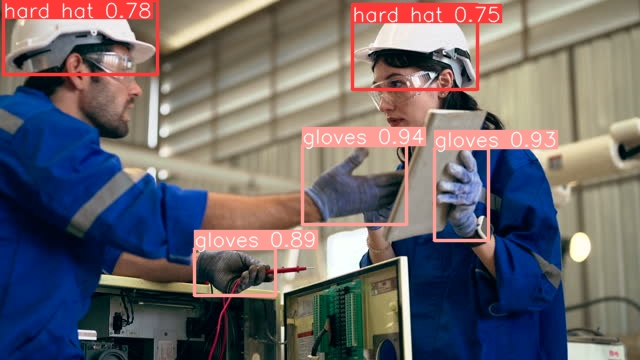

In [5]:
from IPython.display import Image

Image(filename=f"runs/detect/predict/a.jpg", width=600)

#### You can also save a model after setting custom classes. By doing this you create a version of the YOLO-World model that is specialized for your specific use case.

In [6]:
from ultralytics import YOLO

# Initialize a YOLO-World model
model = YOLO('yolov8l-world.pt')

model.set_classes(["hard hat", "gloves"])

# Save the model with the defined offline vocabulary
model.save("custom_yolov8l.pt")

##### After saving, the custom_yolov8s.pt model behaves like any other pre-trained YOLOv8 model but with a key difference: it is now optimized to detect only the classes you have defined.

## Load custom model and perform predictions

In [7]:
from ultralytics import YOLO

# Load your custom model
model = YOLO('custom_yolov8l.pt')


# Run inference to detect your custom classes
results = model.predict('test_images', device='cpu', save=True)

# Show results
results[0].show()


image 1/3 /content/test_images/c.jpg: 384x640 2 hard hats, 3 glovess, 2299.8ms
image 2/3 /content/test_images/d.jpg: 384x640 2 hard hats, 4 glovess, 1937.3ms
image 3/3 /content/test_images/e.jpg: 384x640 1 hard hat, 1925.3ms
Speed: 3.0ms preprocess, 2054.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2
